In [0]:
# https://www.datacamp.com/courses/feature-engineering-for-machine-learning-in-python

In [0]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
from sklearn.model_selection import train_test_split

## 1. Creating Features

In this chapter, you will explore what feature engineering is and how to get started with applying it to real-world data. You will load, explore and visualize a survey response dataset, and in doing so you will learn about its underlying data types and why they have an influence on how you should engineer your features. Using the pandas package you will create new features from both categorical and continuous columns.

#### Why generate features?

**Getting to know your data**

Pandas is one the most popular packages used to work with tabular data in Python. It is generally imported using the alias pd and can be used to load a CSV (or other delimited files) using **read_csv()**.

You will be working with a modified subset of the Stackoverflow survey response data in the first three chapters of this course. This data set records the details, and preferences of thousands of users of the StackOverflow website.

In [5]:
so_survey_csv = 'https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv'
so_survey_csv

'https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv'

In [0]:
# Import pandas
import pandas as pd

In [0]:
# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)

In [5]:
# Print the first five rows of the DataFrame
print(so_survey_df.head(5))

      SurveyDate  ...   RawSalary
0  2/28/18 20:20  ...         NaN
1  6/28/18 13:26  ...   70,841.00
2    6/6/18 3:37  ...         NaN
3    5/9/18 1:06  ...   21,426.00
4  4/12/18 22:41  ...  £41,671.00

[5 rows x 11 columns]


In [6]:
# Print the data type of each column
print(so_survey_df.dtypes)

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object


**Selecting specific data types**

Often a data set will contain columns with several different data types (like the one you are working with). The majority of machine learning models require you to have a consistent data type across features. Similarly, most feature engineering techniques are applicable to only one type of data at a time. For these reasons among others, you will often want to be able to access just the columns of certain types when working with a DataFrame.

In [0]:
# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=[int, float])

In [8]:
# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


#### Dealing with categorical features

**One-hot encoding and dummy variables**

To use categorical variables in a machine learning model, you first need to represent them in a quantitative way. The two most common approaches are to one-hot encode the variables using or to use dummy variables. In this exercise, you will create both types of encoding, and compare the created column sets. 

1. One-hot encode the Country column, adding "OH" as a prefix for each column.

In [0]:
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')

2. Create dummy variables for the Country column, adding "DM" as a prefix for each column.

In [10]:
# Print the columns names
print(one_hot_encoded.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')


**Dealing with uncommon categories**

Some features can have many different categories but a very uneven distribution of their occurrences. Take for example Data Science's favorite languages to code in, some common choices are Python, R, and Julia, but there can be individuals with bespoke choices, like FORTRAN, C etc. In these cases, you may not want to create a feature for each value, but only the more common occurrences.

In [0]:
# Create a series out of the Country column
countries = so_survey_df.Country

In [0]:
# Get the counts of each category
country_counts = countries.value_counts()

In [13]:
# Print the count values for each category
print(country_counts)

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64


In [0]:
# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts<10].index)

In [15]:
# Print the top 5 rows in the mask series
print(mask[:5])

0    False
1    False
2    False
3    False
4    False
Name: Country, dtype: bool


In [16]:
# Label all other categories as Other
countries[mask] = 'Other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
# Print the updated category counts
print(countries.value_counts())

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64


#### Numeric variables

**Binarizing columns**

While numeric values can often be used without any feature engineering, there will be cases when some form of manipulation can be useful. For example on some occasions, you might not care about the magnitude of a value but only care about its direction, or if it exists at all. In these situations, you will want to binarize a column. 

In the so_survey_df data, you have a large number of survey respondents that are working voluntarily (without pay). You will create a new column titled Paid_Job indicating whether each person is paid (their salary is greater than zero).

In [0]:
# Create the Paid_Job column filled with zeros
so_survey_df['Paid_Job'] = 0

In [0]:
# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df['ConvertedSalary']>0, 'Paid_Job'] = 1

In [20]:
# Print the first five rows of the columns
print(so_survey_df[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0         0              NaN
1         1          70841.0
2         0              NaN
3         1          21426.0
4         1          41671.0


**Binning values**

For many continuous values you will care less about the exact value of a numeric column, but instead care about the bucket it falls into. This can be useful when plotting values, or simplifying your machine learning models. It is mostly used on continuous variables where accuracy is not the biggest concern e.g. age, height, wages.

In [0]:
# Bin the continuous variable ConvertedSalary into 5 bins
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 5)

In [22]:
# Print the first 5 rows of the equal_binned column
print(so_survey_df[['equal_binned', 'ConvertedSalary']].head())

          equal_binned  ConvertedSalary
0                  NaN              NaN
1  (-2000.0, 400000.0]          70841.0
2                  NaN              NaN
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0


## 2. Dealing with Messy Data

This chapter introduces you to the reality of messy and incomplete data. You will learn how to find where your data has missing values and explore multiple approaches on how to deal with them. You will also use string manipulation techniques to deal with unwanted characters in your dataset.

#### Why do missing values exist?

**How sparse is my data?**

Most data sets contain missing values, often represented as NaN (Not a Number). If you are working with Pandas you can easily check how many missing values exist in each column.

Let's find out how many of the developers taking the survey chose to enter their age (found in the Age column) and their gender (Gender column).

In [0]:
# Subset the DataFrame
sub_df = so_survey_df[['Age', 'Gender']]

In [24]:
# Print the number of non-missing values
print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Age       999 non-null int64
Gender    693 non-null object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


**Finding the missing values**

While having a summary of how much of your data is missing can be useful, often you will need to find the exact locations of these missing values. Using the same subset of the StackOverflow data from the last exercise (sub_df), you will show how a value can be flagged as missing.

In [25]:
# Print the top 10 entries of the DataFrame
print(sub_df.head(10))

   Age  Gender
0   21    Male
1   38    Male
2   45     NaN
3   46    Male
4   39    Male
5   39    Male
6   34    Male
7   24  Female
8   23    Male
9   36     NaN


In [26]:
# Print the locations of the missing values
print(sub_df.head(10).isnull())

     Age  Gender
0  False   False
1  False   False
2  False    True
3  False   False
4  False   False
5  False   False
6  False   False
7  False   False
8  False   False
9  False    True


In [27]:
# Print the locations of the non-missing values
print(sub_df.head(10).notnull())

    Age  Gender
0  True    True
1  True    True
2  True   False
3  True    True
4  True    True
5  True    True
6  True    True
7  True    True
8  True    True
9  True   False


#### Dealing with missing values (I)

**Listwise deletion**

The simplest way to deal with missing values in your dataset when they are occurring entirely at random is to remove those rows, also called 'listwise deletion'.

Depending on the use case, you will sometimes want to remove all missing values in your data while other times you may want to only remove a particular column if too many values are missing in that column.

In [28]:
# Print the number of rows and columns
print(so_survey_df.shape)

(999, 13)


In [0]:
# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna()

In [30]:
# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

(264, 13)


In [0]:
# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how='any', axis=1)

In [32]:
# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

(999, 8)


In [0]:
# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset=['Gender'])

In [34]:
# Print the shape of the new DataFrame
print(no_gender.shape)

(693, 13)


**Replacing missing values with constants**

While removing missing data entirely maybe a correct approach in many situations, this may result in a lot of information being omitted from your models.

You may find categorical columns where the missing value is a valid piece of information in itself, such as someone refusing to answer a question in a survey. In these cases, you can fill all missing values with a new category entirely, for example 'No response given'.

In [35]:
# Print the count of occurrences
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Female                                                                        53
Transgender                                                                    2
Female;Male                                                                    2
Non-binary. genderqueer. or gender non-conforming                              1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Female;Transgender                                                             1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Name: Gender, dtype: int64


In [0]:
# Replace missing values
so_survey_df['Gender'].fillna(value='Not Given', inplace=True)

In [37]:
# Print the count of each value
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Transgender                                                                    2
Female;Male                                                                    2
Non-binary. genderqueer. or gender non-conforming                              1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Female;Transgender                                                             1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Name: Gender, dtype: int64


#### Dealing with missing values (II)

**Filling continuous missing values**

In the last lesson, you dealt with different methods of removing data missing values and filling in missing values with a fixed string. These approaches are valid in many cases, particularly when dealing with categorical columns but have limited use when working with continuous values. In these cases, it may be most valid to fill the missing values in the column with a value calculated from the entries present in the column.

In [38]:
# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df['StackOverflowJobsRecommend'][:5])

0    NaN
1    7.0
2    8.0
3    NaN
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [0]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

In [40]:
# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.061602
1    7.000000
2    8.000000
3    7.061602
4    8.000000
Name: StackOverflowJobsRecommend, dtype: float64


In [0]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

In [0]:
# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

In [43]:
# Print the top 5 rows
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


**Imputing values in predictive models**

When working with predictive models you will often have a separate train and test DataFrames. In these cases you want to ensure no information from your test set leaks into your train set. 

Apply the measures of central tendency (mean/median etc.) calculated on the train set to both the train and test sets.

#### Dealing with other data issues

**Dealing with stray characters (I)**

In this exercise, you will work with the RawSalary column which contains the wages of the respondents along with the currency symbols and commas, such as $42,000. When importing data from Microsoft Excel, more often that not you will come across data in this form.

In [0]:
# Remove the commas in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

In [0]:
# Remove the dollar signs in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')

**Dealing with stray characters (II)**

In the last exercise, you could tell quickly based off of the df.head() call which characters were causing an issue. In many cases this will not be so apparent. There will often be values deep within a column that are preventing you from casting a column as a numeric type so that it can be used in a model or further feature engineering.

One approach to finding these values is to force the column to the data type desired using pd.to_numeric(), coercing any values causing issues to NaN, Then filtering the DataFrame by just the rows containing the NaN values.

Try to cast the money_df column as a float and it will fail as an additional character can now be found in it. Find the character and remove it so the column can be cast as a float.


In [0]:
# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

In [0]:
# Find the indexes of missing values
idx = numeric_vals.isna()

In [48]:
# Print the relevant rows
print(so_survey_df['RawSalary'][idx])

0             NaN
2             NaN
4       £41671.00
6             NaN
8             NaN
11            NaN
13            NaN
15      £75000.00
16      £10958.00
20            NaN
22            NaN
25            NaN
27            NaN
28            NaN
29            NaN
30            NaN
34            NaN
37            NaN
38      £90000.00
41            NaN
43            NaN
44            NaN
45            NaN
47      £48955.00
48            NaN
49      £19500.00
50            NaN
52            NaN
53      £36000.00
54            NaN
          ...    
925           NaN
926           NaN
927           NaN
929           NaN
934           NaN
936           NaN
937     £63156.00
938      £8496.00
941           NaN
942           NaN
944     £75000.00
948           NaN
949           NaN
952           NaN
954           NaN
955           NaN
960           NaN
961           NaN
962     £80286.00
964    £154000.00
966           NaN
975           NaN
976           NaN
977           NaN
980       

In [0]:
# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£', '')

In [0]:
# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype('float')

In [51]:
# Print the column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
5       120000.0
6            NaN
7       250000.0
8            NaN
9            0.0
10       47904.0
11           NaN
12       95968.0
13           NaN
14         420.0
15       75000.0
16       10958.0
17       51408.0
18       72611.0
19      900000.0
20           NaN
21       30000.0
22           NaN
23       44000.0
24       60000.0
25           NaN
26       80000.0
27           NaN
28           NaN
29           NaN
         ...    
969      37200.0
970      79973.0
971      73428.0
972      56298.0
973      17628.0
974     125000.0
975          NaN
976          NaN
977          NaN
978      75000.0
979       6576.0
980          NaN
981      60000.0
982      80000.0
983      90000.0
984      70000.0
985      39648.0
986      99967.0
987       2352.0
988      50448.0
989          NaN
990          NaN
991      55562.0
992          NaN
993      30000.0
994          NaN
995      58746.0
996      55000

**Method chaining**

When applying multiple operations on the same column (like in the previous exercises), you made the changes in several steps, assigning the results back in each step. However, when applying multiple successive operations on the same column, you can "chain" these operations together for clarity and ease of management. This can be achieved by calling multiple methods sequentially:

> df['column'] = df['column'].method1().method2().method3()

- In this exercise you will repeat the steps you performed in the last two exercises, but do so using method chaining.


In [6]:
# additional step to recover dataset

so_survey_df = pd.read_csv(so_survey_csv)
so_survey_df.shape # (999, 11)

(999, 11)

In [0]:
# Use method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary']\
                              .str.replace(',', '')\
                              .str.replace('$', '')\
                              .str.replace('£', '')\
                              .astype('float')

In [8]:
# Print the RawSalary column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
5       120000.0
6            NaN
7       250000.0
8            NaN
9            0.0
10       47904.0
11           NaN
12       95968.0
13           NaN
14         420.0
15       75000.0
16       10958.0
17       51408.0
18       72611.0
19      900000.0
20           NaN
21       30000.0
22           NaN
23       44000.0
24       60000.0
25           NaN
26       80000.0
27           NaN
28           NaN
29           NaN
         ...    
969      37200.0
970      79973.0
971      73428.0
972      56298.0
973      17628.0
974     125000.0
975          NaN
976          NaN
977          NaN
978      75000.0
979       6576.0
980          NaN
981      60000.0
982      80000.0
983      90000.0
984      70000.0
985      39648.0
986      99967.0
987       2352.0
988      50448.0
989          NaN
990          NaN
991      55562.0
992          NaN
993      30000.0
994          NaN
995      58746.0
996      55000

## 3. Conforming to Statistical Assumptions

In this chapter, you will focus on analyzing the underlying distribution of your data and whether it will impact your machine learning pipeline. You will learn how to deal with skewed data and situations where outliers may be negatively impacting your analysis.

#### Data distributions

**What does your data look like? (I)**

In this exercise, you will create plots to examine the distributions of some numeric columns in the so_survey_df DataFrame, stored in so_numeric_df.

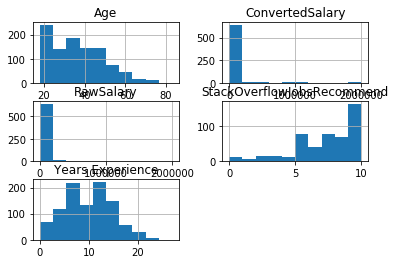

In [11]:
# Create a histogram
so_numeric_df.hist()
plt.show()

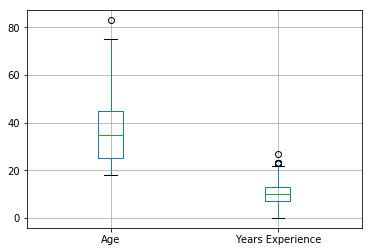

In [12]:
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

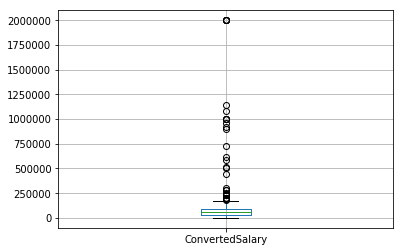

In [13]:
# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

**What does your data look like? (II)**

In the previous exercise you looked at the distribution of individual columns. While this is a good start, a more detailed view of how different features interact with each other may be useful as this can impact your decision on what to transform and how.

In [0]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


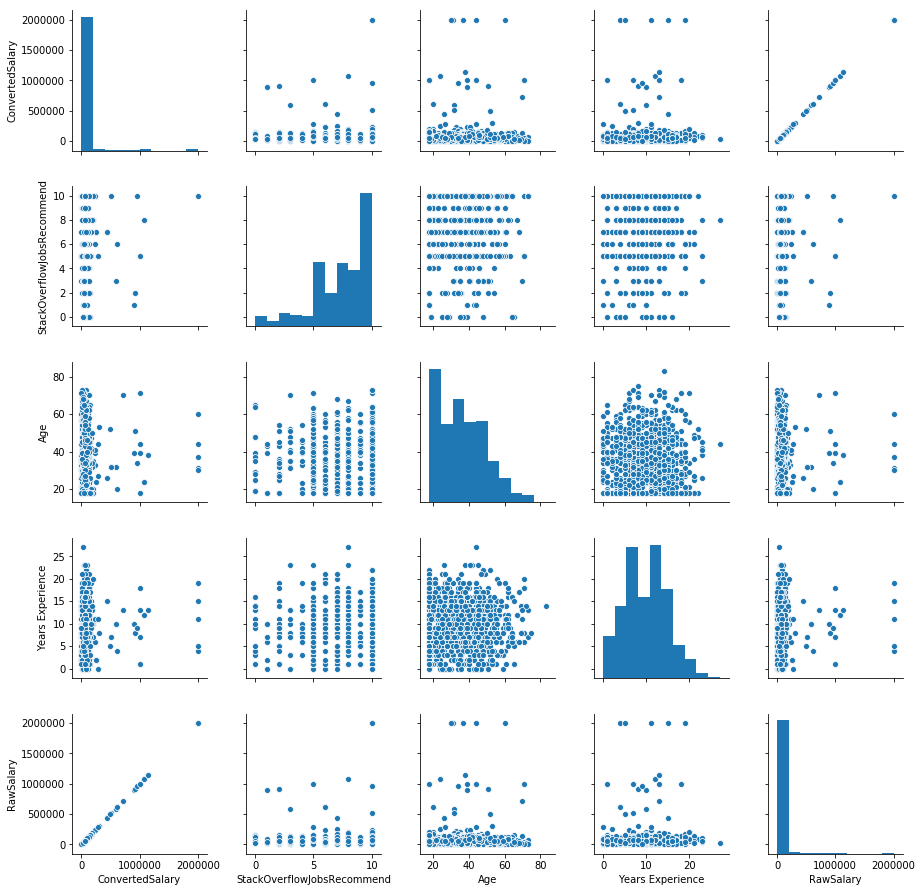

In [15]:
# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()

In [16]:
# Print summary statistics
print(so_numeric_df.describe())

       ConvertedSalary  ...     RawSalary
count     6.650000e+02  ...  6.650000e+02
mean      9.256517e+04  ...  9.256517e+04
std       2.091344e+05  ...  2.091344e+05
min       0.000000e+00  ...  0.000000e+00
25%       2.755000e+04  ...  2.755000e+04
50%       5.556200e+04  ...  5.556200e+04
75%       8.823800e+04  ...  8.823800e+04
max       2.000000e+06  ...  2.000000e+06

[8 rows x 5 columns]


#### Scaling and transformations

**Normalization**

As discussed in the video, in normalization you linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest.

In [0]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [0]:
# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

In [19]:
# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


**Standardization**

While normalization can be useful for scaling a column between two data points, it is hard to compare two scaled columns if even one of them is overly affected by outliers. 

One commonly used solution to this is called standardization, where instead of having a strict upper and lower bound, you center the data around its mean, and calculate the number of standard deviations away from mean each data point is.

In [0]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [0]:
# Instantiate StandardScaler
SS_scaler = StandardScaler()

In [24]:
# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


**Log transformation**

Sometimes you will work with data that closely conforms to normality, e.g the height or weight of a population. On the other hand, many variables in the real world do not follow this pattern e.g, wages or age of a population. 

In this exercise you will use a log transform on the ConvertedSalary column as it has a large amount of its data centered around the lower values, but contains very high values also. These distributions are said to have a long right tail.


In [0]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

In [0]:
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

In [29]:
# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [30]:
# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


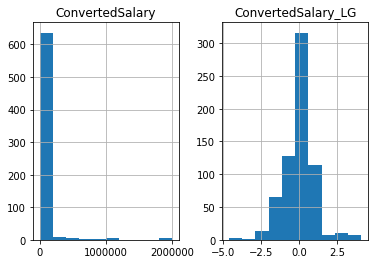

In [31]:
# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

#### Removing outliers

**Percentage based outlier removal**

One way to ensure a small portion of data is not having an overly adverse effect is by removing a certain percentage of the largest and/or smallest values in the column. This can be achieved by finding the relevant quantile and trimming the data using it with a mask. 

This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided. When using this approach, you must remember that even if there are no outliers, this will still remove the same top N percentage from the dataset.

In [0]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

In [0]:
# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

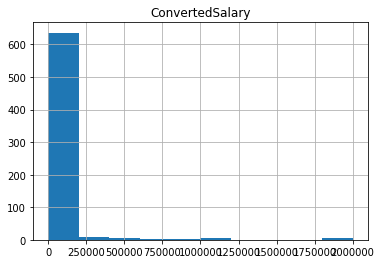

<Figure size 432x288 with 0 Axes>

In [34]:
# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

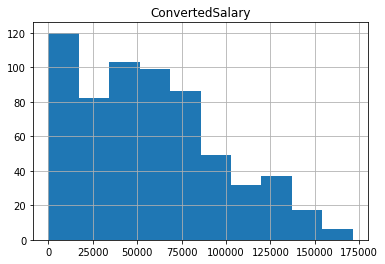

In [35]:
# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

**Statistical outlier removal**

A commonly used alternative approach is to remove data that sits further than three standard deviations from the mean. 

You can implement this by first calculating the mean and standard deviation of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together.



In [0]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

In [0]:
# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

In [0]:
# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) & (so_numeric_df['ConvertedSalary'] > lower)]

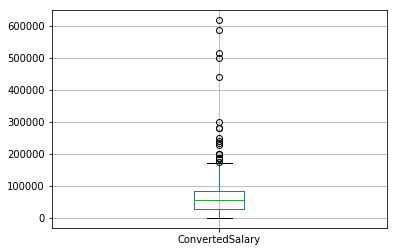

In [39]:
# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

#### Scaling and transforming new data

**Train and testing transformations (I)**

When creating machine learning models you will generally build your models on historic data (train set) and apply your model to new unseen data (test set). In these cases you will need to ensure that the same scaling is being applied to both the training and test data.

*To do this in practice you train the scaler on the train set, and keep the trained scaler to apply it to the test set. You should never retrain a scaler on the test set.*

For this exercise and the next, we split the so_numeric_df DataFrame into train (so_train_numeric) and test (so_test_numeric) sets.

In [0]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [0]:
# Apply a standard scaler to the data
SS_scaler = StandardScaler()

In [47]:
# match dataset
so_numeric_df = so_numeric_df[['ConvertedSalary', 'Age', 'Years Experience']]
so_numeric_df.head(5)

,ConvertedSalary,Age,Years Experience
0,NaN,21,13
1,70841.0,38,9
2,NaN,45,11
3,21426.0,46,12
4,41671.0,39,7


In [48]:
# extra 
from sklearn.model_selection import train_test_split
# Split into training and test set
so_train_numeric, so_test_numeric = train_test_split(
    so_numeric_df, test_size = 299, random_state=42)
print('train set shape: ', so_train_numeric.shape)
print('test set shape: ', so_test_numeric.shape)

train set shape:  (700, 3)
test set shape:  (299, 3)


In [49]:
# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())

     Age    Age_ss
453   29 -0.527627
793   25 -0.833244
209   46  0.771247
309   18 -1.368075
740   26 -0.756840


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Train and testing transformations (II)**

Similar to applying the same scaler to both your training and test sets, if you have removed outliers from the train set, you probably want to do the same on the test set as well. Once again you should ensure that you use the thresholds calculated only from the train set to remove outliers from the test set.

In [0]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

In [0]:
cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

In [0]:
# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]

## 4. Dealing with Text Data

Finally, in this chapter, you will work with unstructured text data, understanding ways in which you can engineer columnar features out of a text corpus. You will compare how different approaches may impact how much context is being extracted from a text, and how to balance the need for context, without too many features being created.

In [54]:
speech_df = pd.read_csv('inaugural_speeches.csv')
print('speech df shape: ', speech_df.shape) # (58, 4)
speech_df.head(3)

speech df shape:  (58, 4)


,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t..."


#### Encoding text

**Cleaning up your text**

Unstructured text data cannot be directly used in most analyses. Multiple steps need to be taken to go from a long free form string to a set of numeric columns in the right format that can be ingested by a machine learning model. The first step of this process is to standardize the data and eliminate any characters that could cause problems later on in your analytic pipeline.

In this chapter you will be working with a new dataset containing the inaugural speeches of the presidents of the United States loaded as speech_df, with the speeches stored in the text column.

In [55]:
# Print the first 5 rows of the text column
print(speech_df['text'][:5])

0    Fellow-Citizens of the Senate and of the House...
1    Fellow Citizens:  I AM again called upon by th...
2    WHEN it was first perceived, in early times, t...
3    Friends and Fellow-Citizens:  CALLED upon to u...
4    PROCEEDING, fellow-citizens, to that qualifica...
Name: text, dtype: object


In [0]:
# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

In [0]:
# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

In [58]:
# Print the first 5 rows of the text_clean column
print(speech_df['text_clean'].head())

0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text_clean, dtype: object


**High level text features**

Once the text has been cleaned and standardized you can begin creating features from the data. The most fundamental information you can calculate about free form text is its size, such as its length and number of words. 

In this exercise (and the rest of this chapter), you will focus on the cleaned/transformed text column (text_clean) you created in the last exercise.

In [0]:
# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

In [0]:
# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

In [0]:
# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

In [62]:
# Print the first 5 rows of these columns
print(speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']])

                                           text_clean  ...  avg_word_length
0   fellow citizens of the senate and of the house...  ...         6.016760
1   fellow citizens   i am again called upon by th...  ...         5.829630
2   when it was first perceived  in early times  t...  ...         5.971158
3   friends and fellow citizens   called upon to u...  ...         5.843318
4   proceeding  fellow citizens  to that qualifica...  ...         5.948363
5   unwilling to depart from examples of the most ...  ...         5.939779
6   about to add the solemnity of an oath to the o...  ...         5.902560
7   i should be destitute of feeling if i was not ...  ...         5.882318
8   fellow citizens   i shall not attempt to descr...  ...         5.893865
9   in compliance with an usage coeval with the ex...  ...         6.075633
10  fellow citizens   about to undertake the arduo...  ...         6.033628
11  fellow citizens   the will of the american peo...  ...         5.988974
12  fellow c

#### Word counts

**Counting words (I)**

Once high level information has been recorded you can begin creating features based on the actual content of each text. One way to do this is to approach it in a similar way to how you worked with categorical variables in the earlier lessons.

- For each unique word in the dataset a column is created.
- For each entry, the number of times this word occurs is counted and the count value is entered into the respective column.

These "count" columns can then be used to train machine learning models.

In [0]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer 

In [0]:
# Instantiate CountVectorizer
cv = CountVectorizer()

In [65]:
# Fit the vectorizer
cv.fit(speech_df['text_clean'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [66]:
# Print feature names
print(cv.get_feature_names())

['abandon', 'abandoned', 'abandonment', 'abate', 'abdicated', 'abeyance', 'abhorring', 'abide', 'abiding', 'abilities', 'ability', 'abject', 'able', 'ably', 'abnormal', 'abode', 'abolish', 'abolished', 'abolishing', 'aboriginal', 'aborigines', 'abound', 'abounding', 'abounds', 'about', 'above', 'abraham', 'abreast', 'abridging', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolutism', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'abstain', 'abstaining', 'abstract', 'abstractions', 'absurd', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abuses', 'academies', 'accept', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accession', 'accident', 'accidental', 'accidents', 'acclaim', 'accommodation', 'accommodations', 'accompanied', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'accorded', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountab

**Counting words (II)**

Once the vectorizer has been fit to the data, it can be used to transform the text to an array representing the word counts. This array will have a row per block of text and a column for each of the features generated by the vectorizer that you observed in the last exercise.

In [0]:
# Apply the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

In [68]:
# Print the full array
cv_array = cv_transformed.toarray()
print(cv_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [70]:
# Print the shape of cv_array
print(cv_array.shape)

(58, 9043)


**Limiting your features**

CountVectorizer has parameters that you can set to reduce the number of features:

- **min_df** : Use only words that occur in more than this percentage of documents. This can be used to remove outlier words that will not generalize across texts.
- **max_df** : Use only words that occur in less than this percentage of documents. This is useful to eliminate very common words that occur in every corpus without adding value such as "and" or "the".

In [0]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df=0.2, max_df=0.8)

In [0]:
# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

In [74]:
# Print the array shape
print(cv_array.shape)

(58, 818)


**Text to DataFrame**

Now that you have generated these count based features in an array you will need to reformat them so that they can be combined with the rest of the dataset. This can be achieved by converting the array into a pandas DataFrame, with the feature names you found earlier as the column names, and then concatenate it with the original DataFrame.

In [0]:
# Create a DataFrame with these features
cv_df = pd.DataFrame(cv_array, 
                     columns=cv.get_feature_names()).add_prefix('Counts_')

In [76]:
# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
print(speech_df_new.head())

                Name         Inaugural Address  ... Counts_young Counts_your
0  George Washington   First Inaugural Address  ...            0           9
1  George Washington  Second Inaugural Address  ...            0           1
2         John Adams         Inaugural Address  ...            0           1
3   Thomas Jefferson   First Inaugural Address  ...            0           7
4   Thomas Jefferson  Second Inaugural Address  ...            0           4

[5 rows x 826 columns]


#### Term frequency-inverse document frequency

**Tf-idf**

While counts of occurrences of words can be useful to build models, words that occur many times may skew the results undesirably. To limit these common words from overpowering your model a form of normalization can be used. 

In this lesson you will be using Term frequency-inverse document frequency (Tf-idf) as was discussed in the video. Tf-idf has the effect of **reducing the value of common words**, while increasing the weight of words that do not occur in many documents.

In [0]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

In [0]:
# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

In [80]:
# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

   TFIDF_action  TFIDF_administration  ...  TFIDF_world  TFIDF_years
0      0.000000              0.133415  ...     0.045929     0.052694
1      0.000000              0.261016  ...     0.000000     0.000000
2      0.000000              0.092436  ...     0.063643     0.073018
3      0.000000              0.092693  ...     0.095729     0.000000
4      0.041334              0.039761  ...     0.054752     0.062817

[5 rows x 100 columns]


**Inspecting Tf-idf values**

After creating Tf-idf features you will often want to understand what are the most highest scored words for each corpus. This can be achieved by isolating the row you want to examine and then sorting the the scores from high to low.

In [0]:
# Isolate the row to be examined
sample_row = tv_df.iloc[0]

In [84]:
# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head(5))

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_citizens      0.229644
Name: 0, dtype: float64


**Transforming unseen data**

When creating vectors from text, any transformations that you perform before training a machine learning model, you also need to apply on the new unseen (test) data. 

To achieve this follow the same approach from the last chapter: *fit the vectorizer only on the training data, and apply it to the test data.*

In [85]:
# extra
train_speech_df, test_speech_df = train_test_split(
    speech_df, test_size = 13, random_state=42)
print('train set shape: ', train_speech_df.shape)
print('test set shape: ', test_speech_df.shape)

train set shape:  (45, 8)
test set shape:  (13, 8)


In [0]:
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

In [0]:
# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

In [0]:
# Transform test data
test_tv_transformed = tv.transform(test_speech_df['text_clean'])

In [89]:
# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), 
                          columns=tv.get_feature_names())\
                          .add_prefix('TFIDF_')
print(test_tv_df.head())

   TFIDF_administration  TFIDF_america  ...  TFIDF_world  TFIDF_years
0              0.128992       0.000000  ...     0.046919     0.053577
1              0.000000       0.000000  ...     0.108962     0.000000
2              0.071099       0.199118  ...     0.224132     0.039375
3              0.027797       0.000000  ...     0.010111     0.046181
4              0.000000       0.128992  ...     0.208487     0.102030

[5 rows x 100 columns]


#### N-grams

**Using longer n-grams**

You may be concerned that by looking at words individually a lot of the context is being ignored. To deal with this when creating models you can use n-grams which are sequence of n words grouped together. For example:

**bigrams**: Sequences of two consecutive words

**trigrams**: Sequences of two consecutive words


These can be automatically created in your dataset by specifying the **ngram_range** argument as a tuple (n1, n2) where all n-grams in the n1 to n2 range are included.

In [90]:
speech_df.head(3)

,Name,Inaugural Address,Date,text,text_clean,char_cnt,word_cnt,avg_word_length
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...,fellow citizens of the senate and of the house...,8616,1432,6.016760
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...,fellow citizens i am again called upon by th...,787,135,5.829630
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t...",when it was first perceived in early times t...,13871,2323,5.971158


In [0]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range=(3,3))

In [0]:
# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text_clean'])

In [94]:
# Print the trigram features
print(cv_trigram_vec.get_feature_names())

['ability preserve protect', 'agriculture commerce manufactures', 'america ideal freedom', 'amity mutual concession', 'anchor peace home', 'ask bow heads', 'best ability preserve', 'best interests country', 'bless god bless', 'bless united states', 'chief justice mr', 'children children children', 'citizens united states', 'civil religious liberty', 'civil service reform', 'commerce united states', 'confidence fellow citizens', 'congress extraordinary session', 'constitution does expressly', 'constitution united states', 'coordinate branches government', 'day task people', 'defend constitution united', 'distinction powers granted', 'distinguished guests fellow', 'does expressly say', 'equal exact justice', 'era good feeling', 'executive branch government', 'faithfully execute office', 'fellow citizens assembled', 'fellow citizens called', 'fellow citizens large', 'fellow citizens world', 'form perfect union', 'general welfare secure', 'god bless america', 'god bless god', 'good greates

**Finding the most common words**

Its always advisable once you have created your features to inspect them to ensure that they are as you would expect. This will allow you to catch errors early, and perhaps influence what further feature engineering you will need to do.

In [0]:
# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

In [96]:
# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

Counts_constitution united states    20
Counts_people united states          13
Counts_preserve protect defend       10
Counts_mr chief justice              10
Counts_president united states        8
dtype: int64
